In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error#, mean_squared_log_error

%matplotlib inline

In [2]:
df = pd.read_csv("dataset/merged/model2_dataset.csv")
df.dropna(axis=1, how="all", inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278083 entries, 0 to 278082
Data columns (total 7 columns):
WEEK                   278083 non-null int64
DAY_OF_WEEK            278083 non-null int64
FL_HOUR                278083 non-null int64
UNIQUE_CARRIER         278083 non-null object
ORIGIN_AIRPORT_RANK    278083 non-null float64
DEP_DELAY              277654 non-null float64
NUM_FLIGHT             278083 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 14.9+ MB


In [4]:
df = pd.concat([df, pd.get_dummies(df["UNIQUE_CARRIER"])], axis=1)
df = pd.concat([df, pd.get_dummies(df["DAY_OF_WEEK"], prefix="DAY_")], axis=1)
df = pd.concat([df, pd.get_dummies(df["WEEK"], prefix="WEEK_")], axis=1)

df.drop("UNIQUE_CARRIER", axis=1, inplace = True)
df.drop("DAY_OF_WEEK", axis=1, inplace = True)
df.drop("WEEK", axis=1, inplace = True)

In [5]:
df_OHE = df.copy()
df_OHE = pd.concat([df_OHE, pd.get_dummies(df["ORIGIN_AIRPORT_RANK"], prefix="RANK_")], axis=1)
df_OHE.drop("ORIGIN_AIRPORT_RANK", axis=1, inplace = True)

In [6]:
df["DEP_DELAY"].isnull().sum()

429

In [7]:
df = df[df["DEP_DELAY"].notnull()]
df_OHE = df_OHE[df_OHE["DEP_DELAY"].notnull()]

In [8]:
X = df.drop("DEP_DELAY", axis=1)
y = df["DEP_DELAY"]

X_OHE = df_OHE.drop("DEP_DELAY", axis=1)
y_OHE = df_OHE["DEP_DELAY"]

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_scale_OHE = scaler.fit_transform(X_OHE)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(X_scale_OHE, y_OHE, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import SGDRegressor

In [13]:
from sklearn.model_selection import ParameterGrid

params = [
    {
    "loss" : ["huber"],
    "penalty" : [None, 'l2', 'l1'],
    "max_iter": [3, 5, 10]
    },
    {
    "loss" : ["huber"],
    "penalty" : ['elasticnet'],
    "l1_ratio" : [0.15, 0.50, 0.85],
    "max_iter": [3, 5, 10]
    }]

for param in ParameterGrid(params):
    model = SGDRegressor(**param)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    print("SGD_Regressor ({}) : MSE {:.4f}, MAE {:.4f}\n".format(param, MSE, MAE) )

SGD_Regressor ({'loss': 'huber', 'max_iter': 3, 'penalty': None}) : MSE 658.1793, MAE 11.5782

SGD_Regressor ({'loss': 'huber', 'max_iter': 3, 'penalty': 'l2'}) : MSE 658.4963, MAE 11.5828

SGD_Regressor ({'loss': 'huber', 'max_iter': 3, 'penalty': 'l1'}) : MSE 658.7113, MAE 11.5894

SGD_Regressor ({'loss': 'huber', 'max_iter': 5, 'penalty': None}) : MSE 656.1734, MAE 11.4762

SGD_Regressor ({'loss': 'huber', 'max_iter': 5, 'penalty': 'l2'}) : MSE 656.5868, MAE 11.4836

SGD_Regressor ({'loss': 'huber', 'max_iter': 5, 'penalty': 'l1'}) : MSE 656.6328, MAE 11.4916

SGD_Regressor ({'loss': 'huber', 'max_iter': 10, 'penalty': None}) : MSE 652.7607, MAE 11.3114

SGD_Regressor ({'loss': 'huber', 'max_iter': 10, 'penalty': 'l2'}) : MSE 653.2546, MAE 11.3257

SGD_Regressor ({'loss': 'huber', 'max_iter': 10, 'penalty': 'l1'}) : MSE 653.5153, MAE 11.3336

SGD_Regressor ({'l1_ratio': 0.15, 'loss': 'huber', 'max_iter': 3, 'penalty': 'elasticnet'}) : MSE 658.5304, MAE 11.5837

SGD_Regressor ({'l1_r

In [26]:
param = {'l1_ratio': 0.15, 'loss': 'huber', 'max_iter': 10, 'penalty': 'elasticnet'}
model = SGDRegressor(**param)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print(MSE, MAE)

653.261923984 11.3268250259


In [16]:
from sklearn.model_selection import ParameterGrid

params = [
    {
    "loss" : ["huber"],
    "penalty" : [None, 'l2', 'l1'],
    "max_iter": [3, 5, 10]
    },
    {
    "loss" : ["huber"],
    "penalty" : ['elasticnet'],
    "l1_ratio" : [0.15, 0.50, 0.85],
    "max_iter": [3, 5, 10]
    }]

for param in ParameterGrid(params):
    model = SGDRegressor(**param)
    model.fit(X_train_OHE, y_train_OHE)

    y_pred_OHE = model.predict(X_test_OHE)

    MSE = mean_squared_error(y_test_OHE, y_pred_OHE)
    MAE = mean_absolute_error(y_test_OHE, y_pred_OHE)
    print("SGD_Regressor ({}) : MSE {:.4f}, MAE {:.4f}\n".format(param, MSE, MAE) )

SGD_Regressor ({'loss': 'huber', 'max_iter': 3, 'penalty': None}) : MSE 658.9657, MAE 11.4878

SGD_Regressor ({'loss': 'huber', 'max_iter': 3, 'penalty': 'l2'}) : MSE 659.1308, MAE 11.4936

SGD_Regressor ({'loss': 'huber', 'max_iter': 3, 'penalty': 'l1'}) : MSE 659.7073, MAE 11.5014

SGD_Regressor ({'loss': 'huber', 'max_iter': 5, 'penalty': None}) : MSE 656.1858, MAE 11.3776

SGD_Regressor ({'loss': 'huber', 'max_iter': 5, 'penalty': 'l2'}) : MSE 656.6751, MAE 11.3862

SGD_Regressor ({'loss': 'huber', 'max_iter': 5, 'penalty': 'l1'}) : MSE 656.8595, MAE 11.3937

SGD_Regressor ({'loss': 'huber', 'max_iter': 10, 'penalty': None}) : MSE 652.2650, MAE 11.2355

SGD_Regressor ({'loss': 'huber', 'max_iter': 10, 'penalty': 'l2'}) : MSE 652.7043, MAE 11.2481

SGD_Regressor ({'loss': 'huber', 'max_iter': 10, 'penalty': 'l1'}) : MSE 652.9500, MAE 11.2560

SGD_Regressor ({'l1_ratio': 0.15, 'loss': 'huber', 'max_iter': 3, 'penalty': 'elasticnet'}) : MSE 659.3070, MAE 11.4949

SGD_Regressor ({'l1_r

In [27]:
param_OHE = {'loss': 'huber', 'max_iter': 10, 'penalty': None}
model_OHE = SGDRegressor(**param_OHE)
model_OHE.fit(X_train_OHE, y_train_OHE)

y_pred_OHE = model_OHE.predict(X_test_OHE)

MSE = mean_squared_error(y_test_OHE, y_pred_OHE)
MAE = mean_absolute_error(y_test_OHE, y_pred_OHE)
print(MSE, MAE)

652.09411332 11.2354417471


In [18]:
start = 100
for x, y, z in zip(y_test[start:start+10], y_pred[start:start+10], y_pred_OHE[start:start+10]):
    print(x , "\t", y, "\t", z)

6.92857142857 	 2.40551370154 	 2.83640041458
3.0 	 -0.118836281086 	 -1.57755473265
1.0 	 2.23467705077 	 2.29855651161
-5.75 	 -1.35385191998 	 -4.30415055417
-3.16666666667 	 0.382251580972 	 -1.27844155111
0.75 	 1.30763285521 	 1.07658079865
-4.0 	 2.44124984782 	 2.12959081608
10.5 	 0.553657179216 	 -0.515393885279
-0.722222222222 	 3.56508095564 	 4.47198343785
16.4571428571 	 1.89140810843 	 1.89565691643


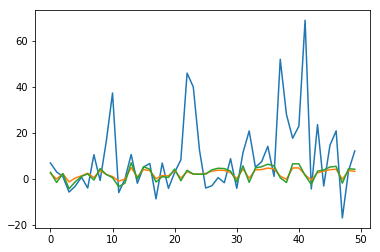

In [21]:
width = 50
plt.plot(range(width), y_test[start:start+width])
plt.plot(range(width), y_pred[start:start+width])
plt.plot(range(width), y_pred_OHE[start:start+width])
plt.show()

# Exploration du modele

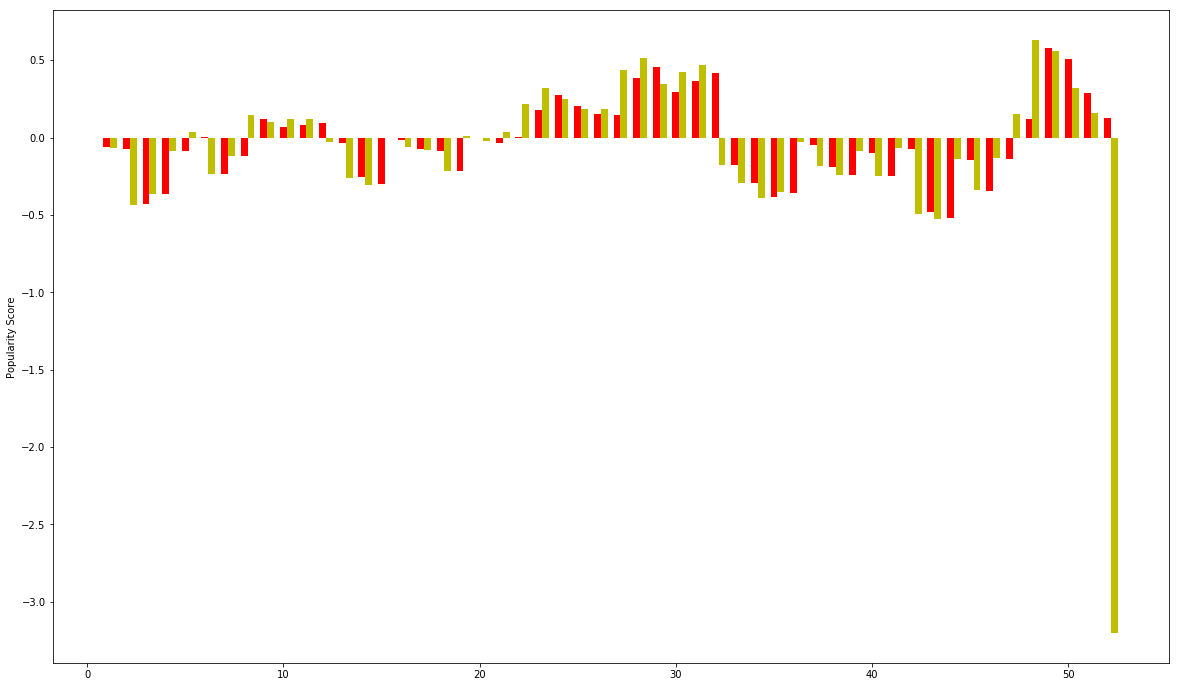

In [40]:
import seaborn as sns 
import pickle

width = 0.35
x = []
x2 = []
y = []
y2 = []
for key, key_ohe, value in zip(model.coef_, model_OHE.coef_, list(df)):
    if value.startswith("WEEK_"):
        x.append(int(value[6:]))
        x2.append(int(value[6:])+width)
        y.append(key)
        y2.append(key_ohe)


# plt.figure(figsize=(20,12))
fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x, y, width, color='r')
rects2 = ax.bar(x2, y2, width, color='y')
# plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

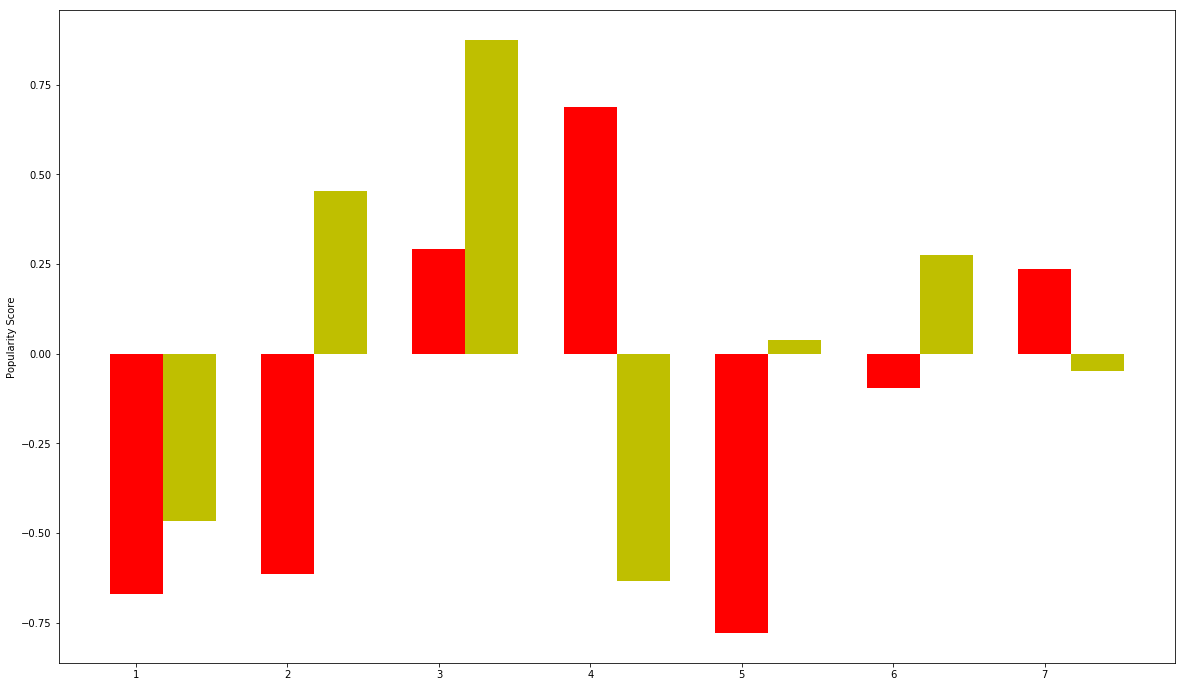

In [42]:
width = 0.35
x = []
x2 = []
y = []
y2 = []
for key, key_ohe, value in zip(model.coef_, model_OHE.coef_, list(df)):
    if value.startswith("DAY_"):
        x.append(int(value[5:]))
        x2.append(int(value[5:])+width)
        y.append(key)
        y2.append(key_ohe)


# plt.figure(figsize=(20,12))
fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x, y, width, color='r')
rects2 = ax.bar(x2, y2, width, color='y')
# plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

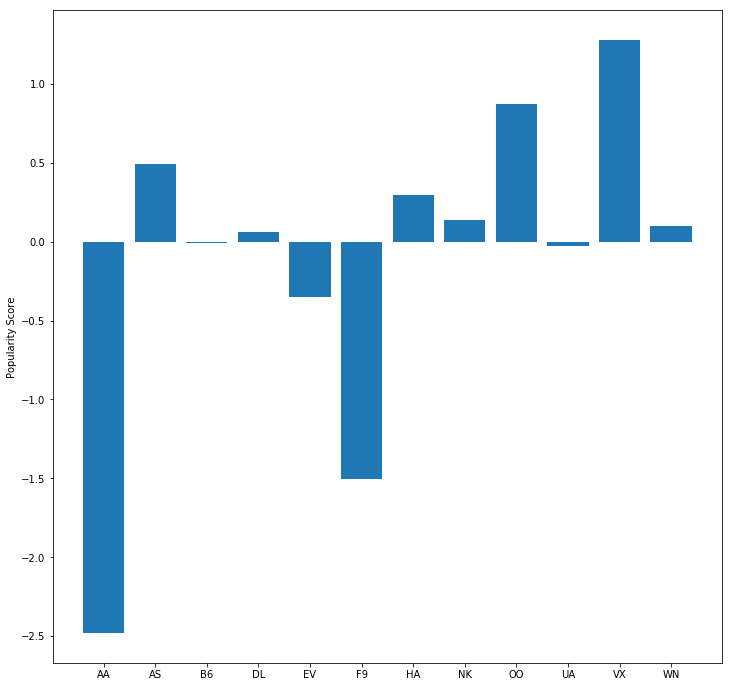

In [46]:
x = []
y = []
for key, value in zip(model.coef_, list(df)):
    if len(value) == 2:
        x.append(value)
        y.append(key)

plt.figure(figsize=(12,12))
plt.bar(x, y)

# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

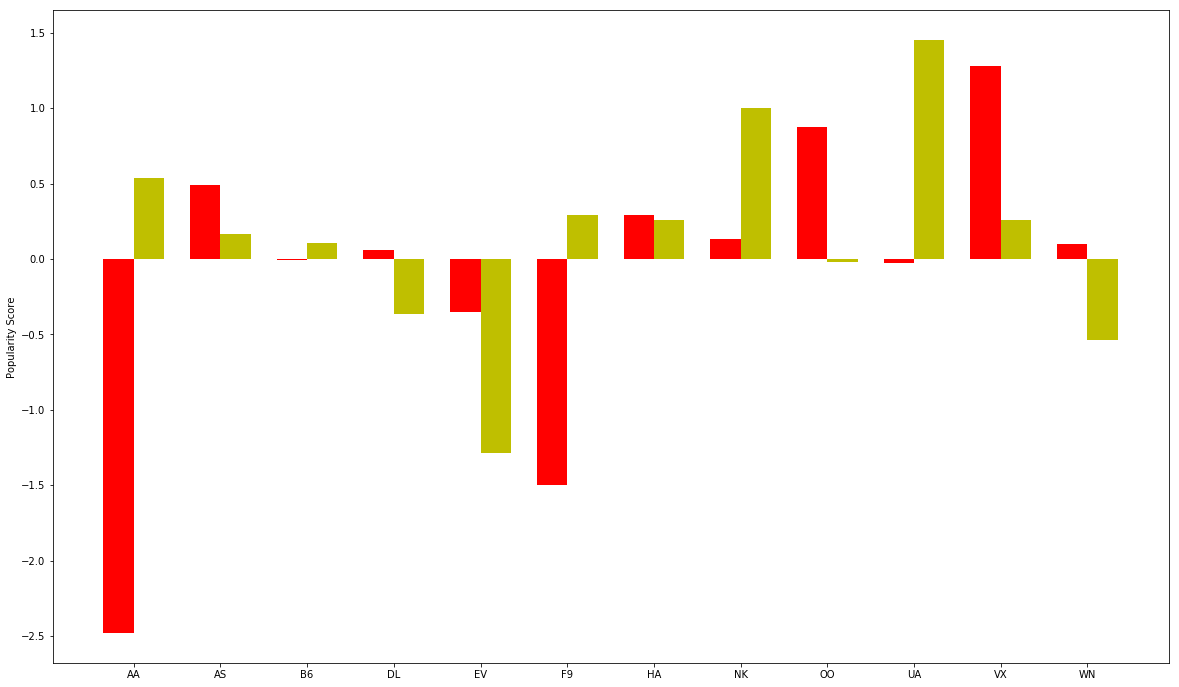

In [53]:
width = 0.35
label = []
x = []
x2 = []
y = []
y2 = []
mid=[]
a = 0
for key, key_ohe, value in zip(model.coef_, model_OHE.coef_, list(df)):
    if len(value) == 2:
        label.append(value)
        y.append(key)
        y2.append(key_ohe)
        x.append(a)
        x2.append(a+width)
        mid.append(a+width/2)
        a += 1

# plt.figure(figsize=(20,12))
fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x, y, width, color='r')
rects2 = ax.bar(x2, y2, width, color='y')
ax.set_xticks(mid)
ax.set_xticklabels(label)
# plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

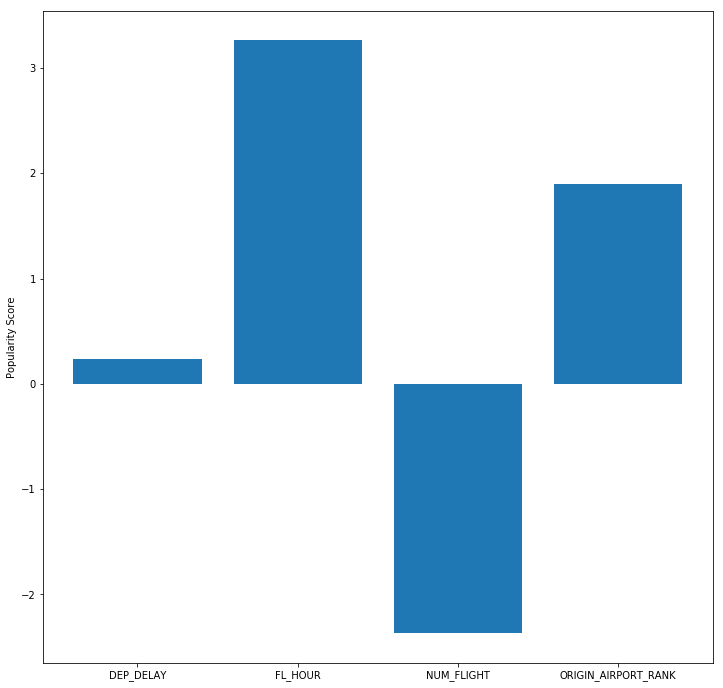

In [25]:
x = []
y = []
for key, value in zip(model.coef_, list(df)):
    if value in ["FL_HOUR", "ORIGIN_AIRPORT_RANK", "DEP_DELAY", "NUM_FLIGHT"] :
        x.append(value)
        y.append(key)

plt.figure(figsize=(12,12))
plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

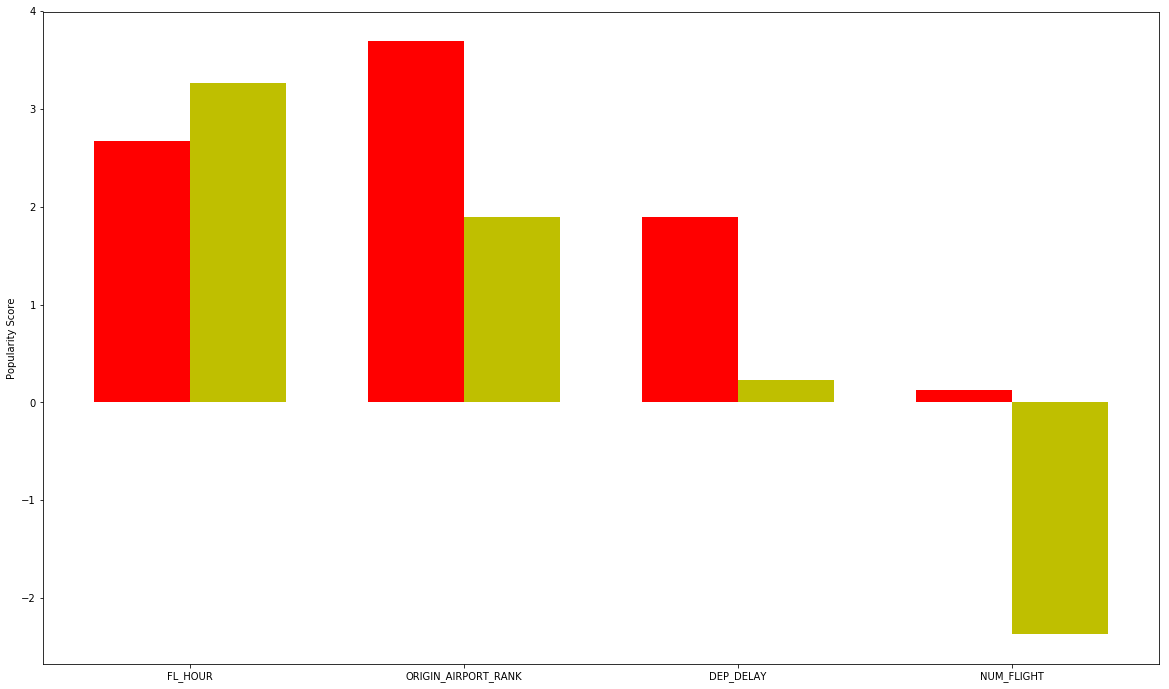

In [52]:
width = 0.35
label = []
x = []
x2 = []
y = []
y2 = []
mid=[]
a = 0
for key, key_ohe, value in zip(model.coef_, model_OHE.coef_, list(df)):
    if value in ["FL_HOUR", "ORIGIN_AIRPORT_RANK", "DEP_DELAY", "NUM_FLIGHT"] :
        label.append(value)
        y.append(key)
        y2.append(key_ohe)
        x.append(a)
        x2.append(a+width)
        mid.append((a+width/2))
        a += 1

# plt.figure(figsize=(20,12))
fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x, y, width, color='r')
rects2 = ax.bar(x2, y2, width, color='y')
ax.set_xticks(mid)
ax.set_xticklabels(label)
# plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()